In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import ensemble
from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('fivethirtyeight')

c:\program files\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python37\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\program files\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train=pd.read_csv('train.csv.zip')
test=pd.read_csv('test.csv.zip')

# See na proportion per columns

In [3]:

print('proportion of nan values in train set : ')
print(train.isnull().sum(axis = 0).sort_values(ascending = False).head(14)/len(train))
print('\n')
print('proportion of nan values in test set : ')
print(test.isnull().sum(axis = 0).sort_values(ascending = False).head(14)/len(train))

proportion of nan values in train set : 
Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
Family_Hist_4          0.323066
Employment_Info_6      0.182786
Medical_History_1      0.149694
Employment_Info_4      0.114161
Employment_Info_1      0.000320
Medical_History_19     0.000000
dtype: float64


proportion of nan values in test set : 
Medical_History_10     0.329466
Medical_History_32     0.326940
Medical_History_24     0.312979
Medical_History_15     0.250316
Family_Hist_5          0.229434
Family_Hist_3          0.186322
Family_Hist_2          0.166383
Insurance_History_5    0.136491
Family_Hist_4          0.112443
Employment_Info_6      0.063775
Medical_History_1      0.050050
Employment_Info_4      0.035988
Employment_Info_1      0.000051
Medical_History_19     0.000000
dtype:

Large proportion of nan values for family hist dans medical hist

# Influence of BMI on risk level 

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

Text(0.5, 1.0, 'Response VS height')

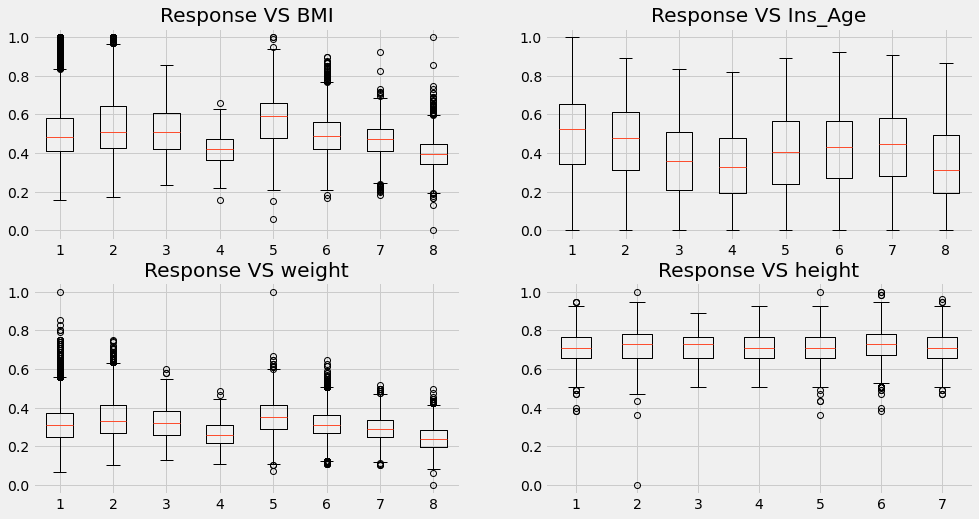

In [4]:
data = []
for i in range(1,9): 
    data.append(train.BMI[train.Response == i])
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
plt.boxplot(data)
plt.title('Response VS BMI')

data = []
for i in range(1,9): 
    data.append(train.Ins_Age[train.Response == i])
plt.subplot(2,2,2)
plt.boxplot(data)
plt.title('Response VS Ins_Age')

data = []
for i in range(1,9): 
    data.append(train.Wt[train.Response == i])
plt.subplot(2,2,3)
plt.boxplot(data)
plt.title('Response VS weight')

data = []
for i in range(1,8): 
    data.append(train.Ht[train.Response == i])
plt.subplot(2,2,4)
plt.boxplot(data)
plt.title('Response VS height')



# Study of employement

## Continuous variables  1-4-6

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

Text(0.5, 1.0, 'Response VS Employement info 6')

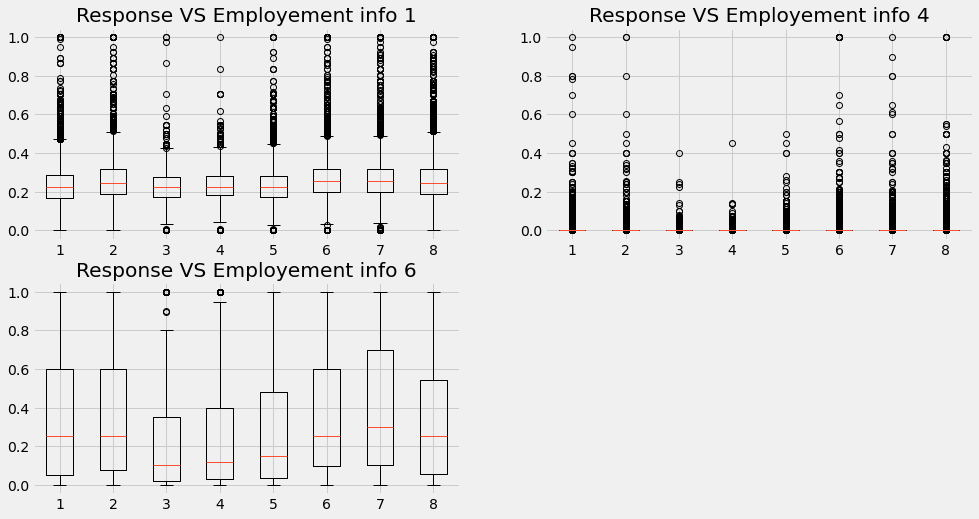

In [5]:

plt.figure(figsize = (15,8))

data  = []
for i in range(1,9):
    x = train.Employment_Info_1[train.Response == i]
    data.append(np.sqrt(x[~np.isnan(x)]))

plt.subplot(2,2,1)
plt.boxplot(data)
plt.title('Response VS Employement info 1')

data  = []
for i in range(1,9):
    x = train.Employment_Info_4[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(2,2,2)
plt.boxplot(data)
plt.title('Response VS Employement info 4')

data  = []
for i in range(1,9):
    x = train.Employment_Info_6[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(2,2,3)
plt.boxplot(data)
plt.title('Response VS Employement info 6')

# plot histogram of log of employement info 1


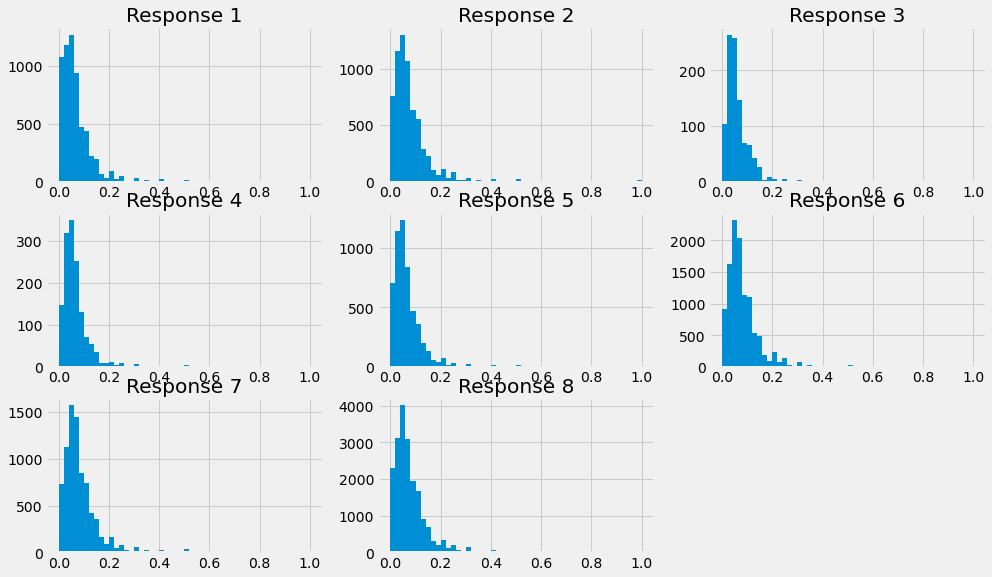

In [18]:
plt.figure(figsize = (15,9))
for i in range(1,9): 
    plt.subplot(3,3,i)
    x = train.Employment_Info_1[train.Response==i]
    x = x[~np.isnan(x)]
    x = [i for i in x]
    plt.hist(x, bins = 50)
    plt.title('Response '+ str(i))

# plot histogram of log of employement info 4


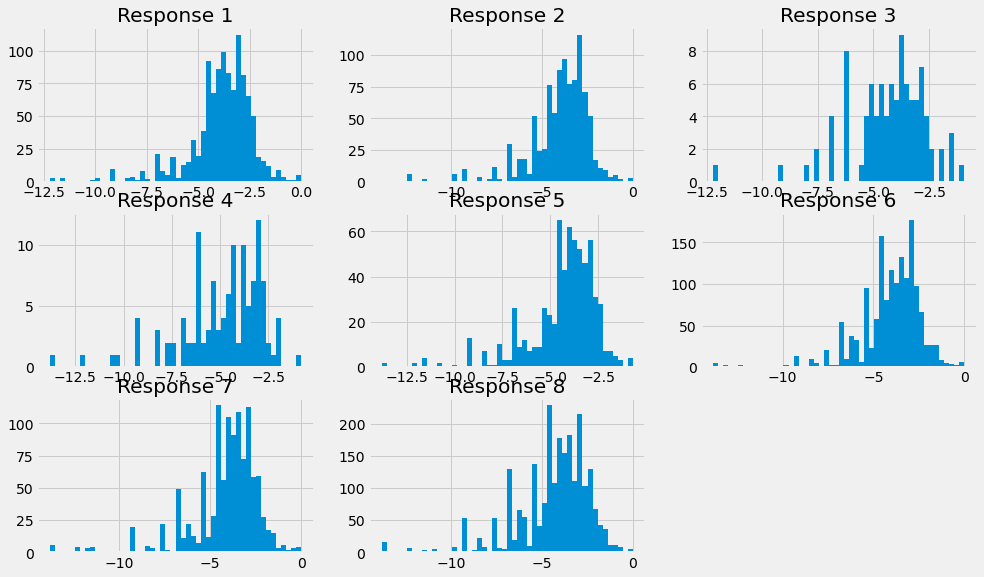

In [19]:
plt.figure(figsize = (15,9))
for i in range(1,9): 
    plt.subplot(3,3,i)
    x = train.Employment_Info_4[train.Response==i]
    x = x[~np.isnan(x)]
    x = ([i for i in x if i!=0])
    plt.hist(np.log(x), bins = 50)
    plt.title('Response '+ str(i))

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


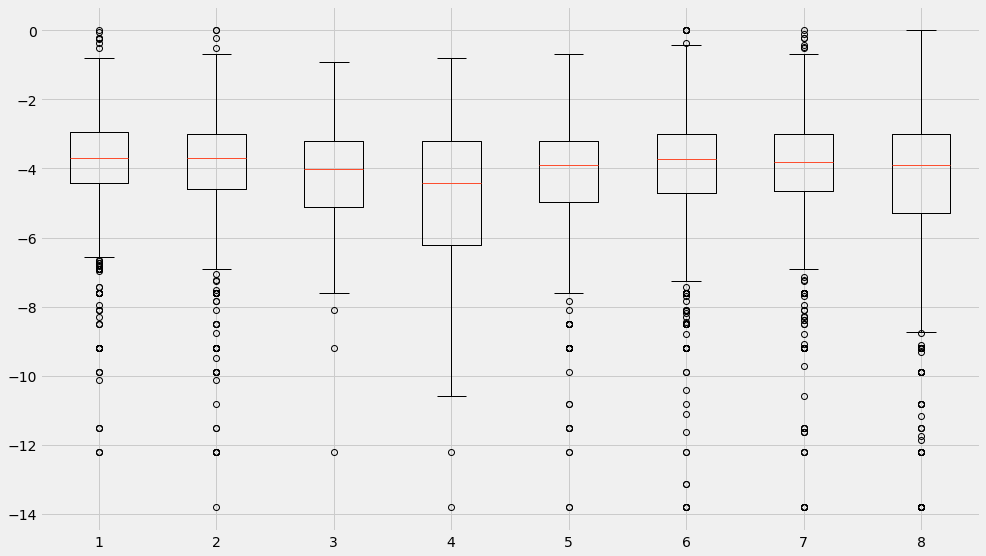

In [8]:
data = []
plt.figure(figsize = (15,9))
for i in range(1,9): 
    x = train.Employment_Info_4[train.Response==i]
    x = x[~np.isnan(x)]
    x = ([i for i in x if i!=0])
    x = np.log(x)
    data.append(x)
plt.boxplot(data)
print('')

# Boxplot for variables : Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5


c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

Text(0.5, 1.0, 'Response VS Family_Hist_5')

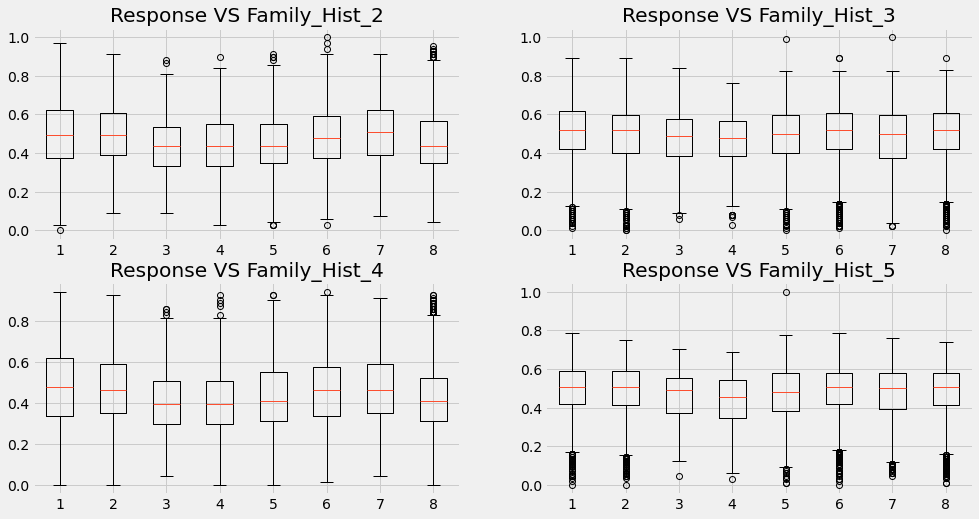

In [9]:

plt.figure(figsize = (15,8))

data  = []
for i in range(1,9):
    x = train.Family_Hist_2[train.Response == i]
    data.append(x[~np.isnan(x)])
plt.subplot(2,2,1)
plt.boxplot(data)
plt.title('Response VS Family_Hist_2')

data  = []
for i in range(1,9):
    x = train.Family_Hist_3[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(2,2,2)
plt.boxplot(data)
plt.title('Response VS Family_Hist_3')

data  = []
for i in range(1,9):
    x = train.Family_Hist_4[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(2,2,3)
plt.boxplot(data)
plt.title('Response VS Family_Hist_4')
          
data  = []
for i in range(1,9):
    x = train.Family_Hist_5[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(2,2,4)
plt.boxplot(data)
plt.title('Response VS Family_Hist_5')


# Discrete variables Medical_History_1, Medical_History_10, 
# Medical_History_15, Medical_History_24, Medical_History_32

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

Text(0.5, 1.0, 'Response VS Medical_History_32')

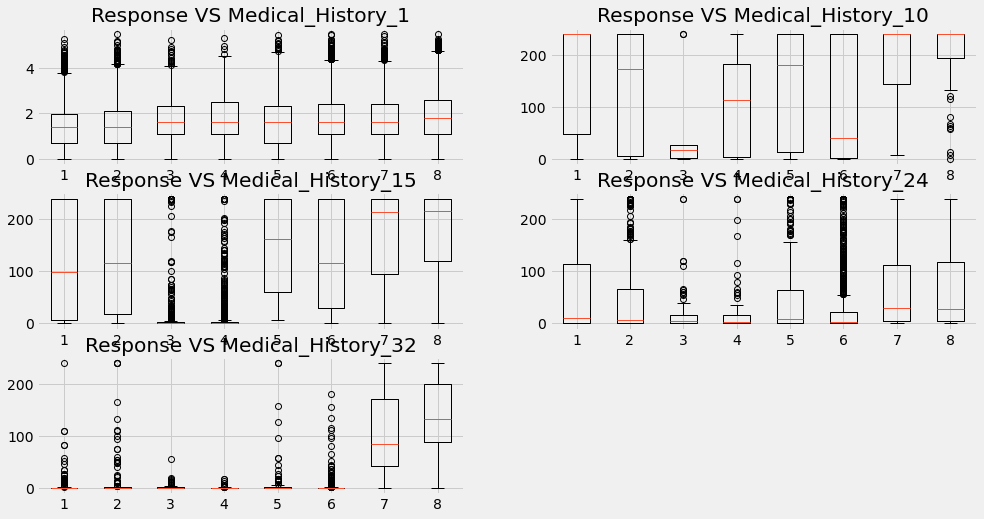

In [11]:


plt.figure(figsize = (15,8))

data  = []
for i in range(1,9):
    x = train.Medical_History_1[train.Response == i]
    data.append(np.log1p(x[~np.isnan(x)]))
#Apply a log1p on Medical history 1
plt.subplot(3,2,1)
plt.boxplot(data)
plt.title('Response VS Medical_History_1')

data  = []
for i in range(1,9):
    x = train.Medical_History_10[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(3,2,2)
plt.boxplot(data)
plt.title('Response VS Medical_History_10')

data  = []
for i in range(1,9):
    x = train.Medical_History_15[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(3,2,3)
plt.boxplot(data)
plt.title('Response VS Medical_History_15')
          
data  = []
for i in range(1,9):
    x = train.Medical_History_24[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(3,2,4)
plt.boxplot(data)
plt.title('Response VS Medical_History_24')

data  = []
for i in range(1,9):
    x = train.Medical_History_32[train.Response == i]
    data.append(x[~np.isnan(x)])

plt.subplot(3,2,5)
plt.boxplot(data)
plt.title('Response VS Medical_History_32')
